In [1]:
import numpy as np
import pandas as pd
import math as mt
import matplotlib.pyplot as plt
import itertools
import category_encoders as ce

import random
try:
    from sklearn.preprocessing import OrdinalEncoder # just to raise an ImportError if Scikit-Learn < 0.20
    from sklearn.preprocessing import OneHotEncoder
except ImportError:
    from future_encoders import OneHotEncoder # Scikit-Learn < 0.20
from  sklearn.model_selection import train_test_split

Create columns name for abalone dataset

In [42]:
col_name = ["sex", "length", "diamater", "height", "whole mass", 
            "Shucked weight", "Viscera weight", "Shell weight","Rings"]

Open abalone dataset from drive

In [43]:
abalone_dt = pd.read_csv("/Users/Morgan/Documents/316/abalone.data", sep = ",",  names =  col_name)

Inspect abalone dataset

In [45]:
abalone_dt.head()

,sex,length,diamater,height,whole mass,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [46]:
abalone_dt.tail()

,sex,length,diamater,height,whole mass,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,12


Inspect unique values of Rings columns

In [47]:
abalone_dt['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

Encode abalone Rings columns 0-10 : 1, 11-20 : 2, 21-29: 3

In [48]:
encoder= ce.OrdinalEncoder(cols=['Rings'],return_df=True,
                           mapping=[{'col':'Rings',
'mapping':{ None: 0, 1 : 1, 2 : 1, 3 : 1, 4 : 1, 5 : 1, 6 : 1, 7 : 1, 8 : 1, 9 : 1, 10 : 1,
            11 : 2, 12 : 2, 13 : 2, 14 : 2, 15 : 2, 16 : 2, 17 : 2, 18 : 2, 19 : 2, 20 : 2,
            21 : 3, 22 : 3, 23 : 3, 24 : 3, 25 : 3, 26 : 3, 27 : 3, 28 : 3, 29 : 3}}])

In [8]:
abalone_dt_transformed = encoder.fit_transform(abalone_dt)

Inspect abalone dataset after encoding

In [49]:
abalone_dt_transformed.head()

,sex,length,diamater,height,whole mass,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,2
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,1
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,1
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,1
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,1


In [50]:
abalone_dt_transformed.tail()

,sex,length,diamater,height,whole mass,Shucked weight,Viscera weight,Shell weight,Rings
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,2
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,1
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,1
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,1
4176,M,0.710,0.555,0.195,1.9485,0.9455,0.3765,0.4950,2


Split abalone dataset into training and test set by 0.7 and 0.3

In [51]:
#Function to spilt dataset into training set and test set
def train_test_split(dt, test_size):
    if isinstance(test_size, float):
     test_size = round(test_size * len(dt))
    
    indices = dt.index.tolist()
    test_indices = random.sample(population = indices, k = test_size)

    test_df = dt.loc[test_indices]
    train_df = dt.drop(test_indices)


    return train_df, test_df  

In [52]:
train_dt, test_dt = train_test_split(abalone_dt_transformed, test_size = 0.3)

Inspect length of test and training dataset

In [54]:
print(len(train_dt),len(test_dt))
print(type(train_dt),type(test_dt))

2924 1253
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


Create Naive Bayes Rings functions to calculate Rings colums from scratch

In [55]:
def NaiveBayesRings(train_dt):
    ring_matrix = {1: 0,2: 0,3: 0}
    
    counts = train_dt["Rings"].value_counts(ascending=True)
                
    total_number = len(train_dt)
    ring_matrix[1] = round((counts[1]/total_number), 4) 
    ring_matrix[2] = round((counts[2]/total_number), 4) 
    ring_matrix[3] = round((counts[3]/total_number), 4) 
    
    return ring_matrix   

Test Naive Bayes Rings functions for test and training dataset

In [59]:
NaiveBayesRings(train_dt)

{1: 0.6536, 2: 0.3382, 3: 0.0082}

In [60]:
NaiveBayesRings(test_dt)

{1: 0.6536, 2: 0.3368, 3: 0.0096}

Create Naive Bayes Rings functions to compare Sex columns and Rings columns from scratch

In [65]:
def NaiveBayesSex(train_dt):
    sex_matrix = {"F": [0,0,0,0],"I": [0,0,0,0], "M": [0,0,0,0]}

    for i in range(len(train_dt)):
        for j in range(1,4):
            if(train_dt.iat[i,0]=="F" and train_dt.iat[i,8]==j): 
                 sex_matrix["F"][j] += 1
            elif(train_dt.iat[i,0]=="I" and train_dt.iat[i,8]==j): 
                sex_matrix["I"][j] += 1
            elif(train_dt.iat[i,0]=="M" and train_dt.iat[i,8]==j): 
                 sex_matrix["M"][j] += 1

    ring_numbers = train_dt["Rings"].value_counts(ascending=True)

    array = [0, ring_numbers[1], ring_numbers[2], ring_numbers[3]]
    for i in range(1,4):
         sex_matrix["F"][i] = round((sex_matrix["F"][i]/array[i]),4)
         sex_matrix["I"][i] = round((sex_matrix["I"][i]/array[i]),4)
         sex_matrix["M"][i] = round((sex_matrix["M"][i]/array[i]),4)

    return  sex_matrix

Test Naive Bayes functions for test and training dataset

In [66]:
NaiveBayesSex(train_dt)

{'F': [0, 0.2313, 0.4388, 0.5],
 'I': [0, 0.4411, 0.1082, 0.0417],
 'M': [0, 0.3276, 0.453, 0.4583]}

In [67]:
NaiveBayesSex(test_dt)

{'F': [0, 0.2808, 0.4289, 0.6667],
 'I': [0, 0.42, 0.1114, 0.0],
 'M': [0, 0.2991, 0.4597, 0.3333]}

Create Naive Bayes Rings functions for the rest of the dataset

In [68]:
def NaiveBayesAbalone(train_dt):
    train_dt_values = {
        "length"    : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]},
        "diameter"  : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]},
        "height"    : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]},
        "whole_mass"   : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]},
        "shucked_weight" : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]},
        "viscera_weight" : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]},
        "shell_weight"   : { 1: [], 2: [], 3: [], "mean":[0,0,0,0], "stdev":[0,0,0,0]}
    }

    keys_array = [] 
    for key in train_dt_values.keys(): 
         keys_array.append(key) 

    for i in range(len(train_dt)):
        for j in range(1,4):
            if(train_dt.iat[i,8]==j): 
                for index in range(len(keys_array)):
                    train_dt_values[ keys_array[index]][j].append(train_dt.iat[i,(index+1)])
    for i in range(1,4):
        for index in range(len(keys_array)):
            train_dt_values[keys_array[index]]["mean"][i] = round((np.mean(train_dt_values[keys_array[index]][i])),4)
            train_dt_values[keys_array[index]]["stdev"][i]  = round((np.std(train_dt_values[keys_array[index]][i])),4)   
    return train_dt_values, keys_array

Test Naive Bayes functions for test and training dataset

In [70]:
NaiveBayesAbalone(train_dt)

({'length': {1: [0.35,
    0.44,
    0.425,
    0.475,
    0.47,
    0.44,
    0.365,
    0.45,
    0.38,
    0.55,
    0.615,
    0.58,
    0.465,
    0.45,
    0.355,
    0.24,
    0.205,
    0.47,
    0.46,
    0.325,
    0.525,
    0.52,
    0.4,
    0.47,
    0.405,
    0.5,
    0.445,
    0.47,
    0.245,
    0.505,
    0.45,
    0.52,
    0.475,
    0.4,
    0.595,
    0.6,
    0.56,
    0.46,
    0.625,
    0.535,
    0.47,
    0.475,
    0.36,
    0.53,
    0.5,
    0.51,
    0.495,
    0.465,
    0.435,
    0.425,
    0.44,
    0.56,
    0.405,
    0.385,
    0.36,
    0.375,
    0.35,
    0.425,
    0.305,
    0.345,
    0.375,
    0.565,
    0.475,
    0.46,
    0.28,
    0.175,
    0.17,
    0.605,
    0.635,
    0.605,
    0.515,
    0.53,
    0.525,
    0.52,
    0.36,
    0.315,
    0.225,
    0.56,
    0.355,
    0.585,
    0.42,
    0.4,
    0.435,
    0.37,
    0.55,
    0.405,
    0.47,
    0.415,
    0.445,
    0.39,
    0.295,
    0.075,
    0.11,
    0.16,
    0.

In [71]:
NaiveBayesAbalone(test_dt)

({'length': {1: [0.385,
    0.335,
    0.625,
    0.435,
    0.475,
    0.16,
    0.55,
    0.65,
    0.415,
    0.615,
    0.475,
    0.495,
    0.43,
    0.44,
    0.555,
    0.6,
    0.585,
    0.615,
    0.54,
    0.48,
    0.5,
    0.43,
    0.545,
    0.575,
    0.335,
    0.375,
    0.525,
    0.47,
    0.6,
    0.615,
    0.485,
    0.15,
    0.445,
    0.43,
    0.5,
    0.27,
    0.465,
    0.42,
    0.235,
    0.52,
    0.265,
    0.645,
    0.56,
    0.6,
    0.505,
    0.605,
    0.68,
    0.325,
    0.525,
    0.685,
    0.475,
    0.57,
    0.6,
    0.375,
    0.535,
    0.61,
    0.39,
    0.405,
    0.665,
    0.64,
    0.435,
    0.545,
    0.43,
    0.6,
    0.44,
    0.335,
    0.6,
    0.635,
    0.72,
    0.375,
    0.165,
    0.37,
    0.61,
    0.41,
    0.46,
    0.585,
    0.34,
    0.625,
    0.465,
    0.65,
    0.4,
    0.5,
    0.34,
    0.735,
    0.3,
    0.49,
    0.375,
    0.58,
    0.335,
    0.69,
    0.59,
    0.62,
    0.585,
    0.65,
    0.465,


Create function to calculate probability density

In [72]:
def compute_probability_density(num,mean,stdev):
    probability_density  = (1 / (mt.sqrt(2*mt.pi)*stdev)) * mt.exp(-(mt.pow(num-mean,2))/(2*mt.pow(stdev,2)))
    
    return round((probability_density),4)

Create function to predict gaussian values

In [73]:
def predict_gaussian_values(test_dt,sex_probability,train_values,ring_values,keys_values):
    
    predict_values=[]
    for row in range(len(test_dt)):
        PredictionElement_values= [0,1,1,1]

        for i in range(1,4):
            if  (test_dt.iat[row,0] == "M"):  PredictionElement_values[i] *= sex_probability["M"][i]
            elif(test_dt.iat[row,0] == "I"):  PredictionElement_values[i] *= sex_probability["I"][i]
            elif(test_dt.iat[row,0] == "F"):  PredictionElement_values[i] *= sex_probability["F"][i]

            for index in range(len(keys_values)):
                PredictionElement_values[i] *= compute_probability_density(test_dt.iat[row,index+1],train_values[keys_values[index]]["mean"][i],
                                                          train_values[keys_values[index]]["stdev"][i])
            PredictionElement_values[i] *= ring_values[i]
            PredictionElement_values[i] = round((PredictionElement_values[i]),4)
        predict_values.append(PredictionElement_values.index(max(PredictionElement_values)))
        
    return predict_values

Create function to generate confusion matrix

In [74]:
def calculate_confusion_matrix(predicted_values, validated_values):
    
    confusion_matrix = [[0,0,0],[0,0,0],[0,0,0]]
    if(len(predicted_values) != len(validated_values)):
        print("Invalid length")
    else:
     for i in range(len(validated_values)):
           for j in range(1,4):
               if(validated_values.iat[i,8] == j):
                  confusion_matrix[j-1][predicted_values[i] - 1] +=1
    valid_classification =  confusion_matrix[0][0] + confusion_matrix[1][1] + confusion_matrix[2][2]
    misclassification = len(validated_values) - valid_classification
    accuracy = valid_classification / len(validated_values)
    print("confusion matrix: ",confusion_matrix)
    print("total valid classification : ",valid_classification)
    print("total missclassification  : ", misclassification)
    print("accuracy  : ",accuracy)
    plot_confusion_matrix(confusion_matrix)
    
    return  confusion_matrix
       
       
        
    

Create function to plot confusion matrix into graphical form

In [75]:
def  plot_confusion_matrix(confusion_matrix):
    confusion_matrix = np.array(confusion_matrix)
    
    age_categories = ["Young", "Adult", "Old"]
    plt.figure(figsize=(9, 7))
    
    
    plt.imshow(confusion_matrix,interpolation="nearest",cmap=plt.cm.Greys)
    #plt.title('Confusion Matrix')
    
    plt.colorbar()
    
    tickMarks = np.arange(len(age_categories))
    plt.xticks(tickMarks,  age_categories , rotation=50)
    plt.yticks(tickMarks,  age_categories )
    
    threshold = confusion_matrix.max() / 2
    x = confusion_matrix.shape[0]
    y = confusion_matrix.shape[1]
    
    plt.rcParams.update({'font.size': 20})
    for i, j in itertools.product(range(x), range(y)):
        plt.text(j,i, format(confusion_matrix[i,j], 'd'), ha="center", va="baseline",
                color="red" if confusion_matrix[i,j] >  threshold else "red")
    
    plt.tight_layout()
    plt.ylabel('Actual Matrix Values')
    plt.xlabel('Predicted Matrix Values')
    
    print("\nConfusion Matrix:")
    print(confusion_matrix)
    
    plt.show()

    
    


create function to calculate gaussain distribution for both test and train set

In [76]:
def compute_gaussian_distribution(train_dt,test_dt,option):    
    
    rings = NaiveBayesRings(train_dt)
    sex_probability = NaiveBayesSex(train_dt)
    train_values,keys = NaiveBayesAbalone(train_dt)
    
    if(option == "Test"): predict_set = test_dt
    elif(option == "Train"): predict_set = train_dt
        
    prediction_values = predict_gaussian_values(predict_set,sex_probability,train_values,rings,keys)
    confusion_matrix = calculate_confusion_matrix(prediction_values,predict_set)
    
    return confusion_matrix

Create and plot confusion matrix for both test and train set

confusion matrix:  [[541, 275, 3], [123, 257, 42], [5, 5, 2]]
total valid classification :  800
total missclassification  :  453
accuracy  :  0.6384676775738228

Confusion Matrix:
[[541 275   3]
 [123 257  42]
 [  5   5   2]]


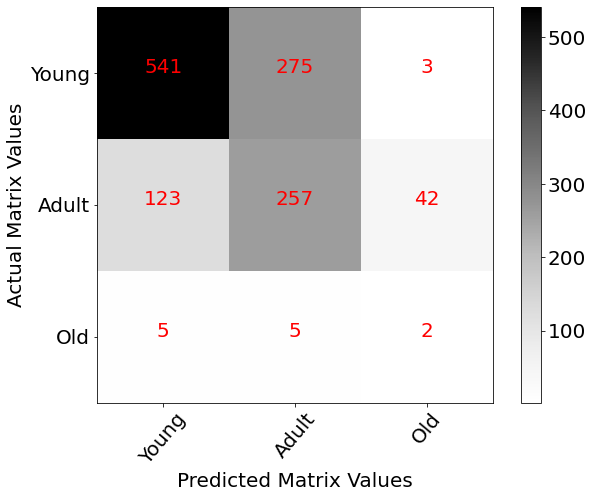

In [77]:
confusion_matrix_test = compute_gaussian_distribution(train_dt,test_dt,"Test")

confusion matrix:  [[1280, 619, 12], [292, 629, 68], [4, 14, 6]]
total valid classification :  1915
total missclassification  :  1009
accuracy  :  0.6549247606019152

Confusion Matrix:
[[1280  619   12]
 [ 292  629   68]
 [   4   14    6]]


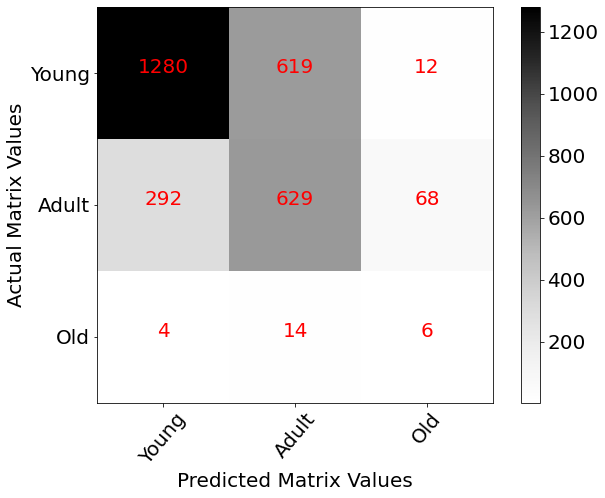

In [79]:
confusion_matrix_train = compute_gaussian_distribution(train_dt,test_dt,"Train")